# Лабораторная работа № 6 Построение модели линейной одномерной регрессии
## Вариант 9


**Цель работы:** изучение принципов построения модели линейной одномерной регрессии.

Продолжительность работы: - 4 часа.

Мягкий дедлайн (5 баллов): 07.11.2023

Жесткий дедлайн (2.5 баллов): 21.11.2023

**Задачи**
реализовать каонвейер для выполнения всех стадий обработки данных при решении задачи одномерной регрессии;
получение теоретических представлений о задаче регресии;
получение навыков использования пайплайна при решении задачи машинного обучения;
получение навыков рефакторинга кода в задачах машинного обучения.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_source = "./dataset/Rice_Cammeo_Osmancik.csv"
data = pd.read_csv(data_source, 
                   delimiter=',',
                   names=['area_A',
                          'perimeter_P',
                          'Major_Axis_Length',
                          'Minor_Axis_Length',
                          'Eccentricity', 
                          'Convex_Area',
                          'Extent', 'Class'],
                  header=None)
data.head(10)

,area_A,perimeter_P,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,0
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,0
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,0
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,0
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,0
5,13479,477.015991,200.053055,86.650291,0.901328,13786,0.657897,0
6,15757,509.281006,207.296677,98.336136,0.880323,16150,0.589708,0
7,16405,526.570007,221.612518,95.436707,0.902521,16837,0.658888,0
8,14534,483.640991,196.650818,95.050682,0.875429,14932,0.649651,0
9,13485,471.570007,198.272644,87.727287,0.896789,13734,0.572320,0


In [79]:
X = data.iloc[:, 1:2].values
y = data.iloc[:, 2:3].values
print ("Матрица признаков"); print(X[:10])
print ("Зависимая переменная"); print(y[:10])

Матрица признаков
[[525.57897949]
 [494.31100464]
 [501.12200928]
 [458.34298706]
 [507.16699219]
 [477.01599121]
 [509.28100586]
 [526.57000732]
 [483.64099121]
 [471.57000732]]
Зависимая переменная
[[229.74987793]
 [206.02006531]
 [214.10678101]
 [193.33738708]
 [211.74337769]
 [200.05305481]
 [207.29667664]
 [221.61251831]
 [196.65081787]
 [198.27264404]]


In [80]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(X[:, :])
X_without_nan = X.copy()
X_without_nan[:, :] = imputer.transform(X[:, :])
X_without_nan

array([[525.57897949],
       [494.31100464],
       [501.12200928],
       ...,
       [442.49899292],
       [392.29699707],
       [404.70999146]])

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 0) 

In [82]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [83]:
y_pred = regressor.predict(X_test)
print(y_pred)

[[181.62990939]
 [224.9021368 ]
 [191.0127447 ]
 [219.53276358]
 [212.66790569]
 [201.88818687]
 [172.4899579 ]
 [183.9631114 ]
 [216.85567844]
 [184.97278483]
 [197.37751861]
 [173.28865046]
 [164.51733413]
 [201.66387797]
 [213.40944911]
 [179.17620295]
 [200.81993993]
 [167.38348232]
 [180.17968475]
 [202.67068814]
 [161.42401378]
 [175.79045113]
 [170.11103078]
 [168.07357409]
 [161.77596349]
 [178.45657735]
 [224.01248817]
 [203.34841116]
 [170.76731561]
 [169.74097125]
 [210.21563815]
 [177.55549017]
 [174.00113969]
 [189.09436808]
 [170.13770135]
 [187.52413316]
 [195.89252775]
 [205.46778355]
 [179.9982377 ]
 [201.82438099]
 [182.01806421]
 [175.23180818]
 [171.02782961]
 [173.77110425]
 [174.74697075]
 [179.77105101]
 [173.67776455]
 [202.353025  ]
 [201.73721839]
 [191.80430088]
 [180.47402022]
 [173.46820804]
 [184.19885884]
 [155.32738442]
 [216.27511767]
 [190.08308295]
 [209.29645568]
 [180.52355335]
 [207.86718959]
 [172.55139467]
 [176.2538649 ]
 [210.70428358]
 [163.44

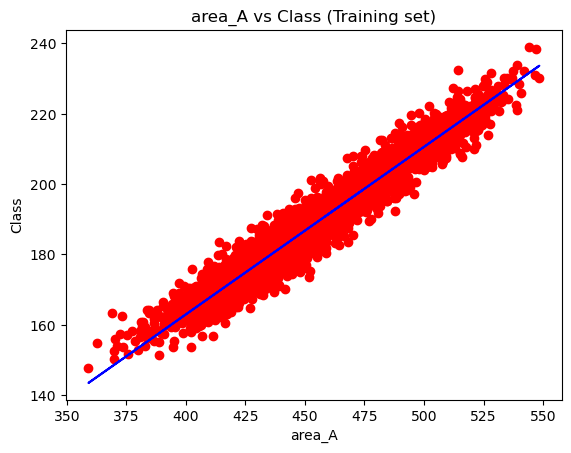

In [84]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('area_A vs Class (Training set)')
plt.xlabel('area_A')
plt.ylabel('Class')
plt.show()

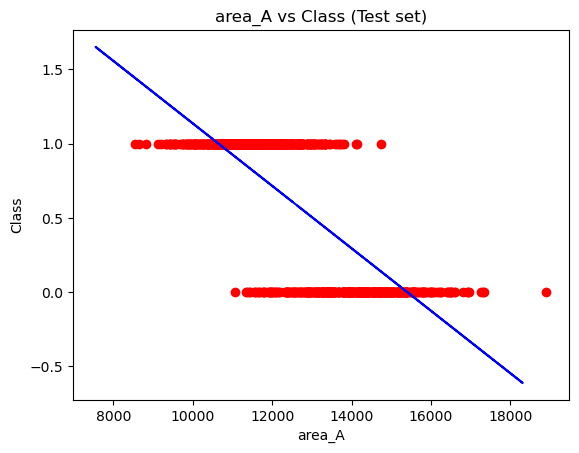

In [9]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('area_A vs Class (Test set)')
plt.xlabel('area_A')
plt.ylabel('Class')
plt.show()

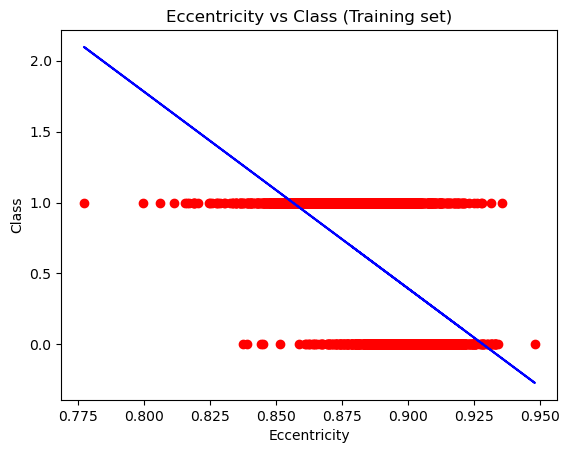

In [29]:
X1 = data.iloc[:, 4:5].values
y1 = data.iloc[:, -1].values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 1/4, random_state = 0) 
regressor = LinearRegression()
regressor.fit(X1_train, y1_train)
y1_pred = regressor.predict(X1_test)
plt.scatter(X1_train, y1_train, color = 'red')
plt.plot(X1_train, regressor.predict(X1_train), color = 'blue')
plt.title('Eccentricity vs Class (Training set)')
plt.xlabel('Eccentricity')
plt.ylabel('Class')
plt.show()

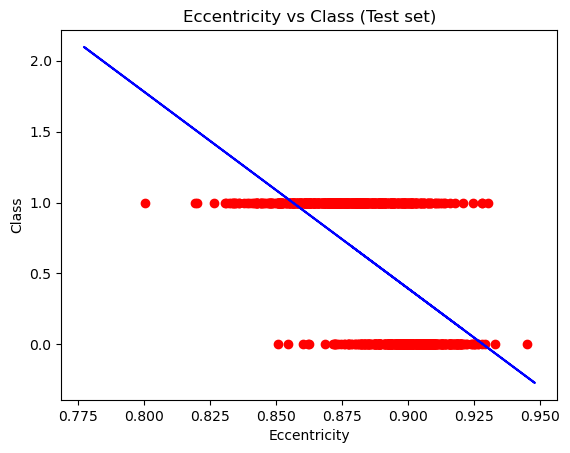

In [25]:
plt.scatter(X1_test, y1_test, color = 'red')
plt.plot(X1_train, regressor.predict(X1_train), color = 'blue')
plt.title('Eccentricity vs Class (Test set)')
plt.xlabel('Eccentricity')
plt.ylabel('Class')
plt.show()

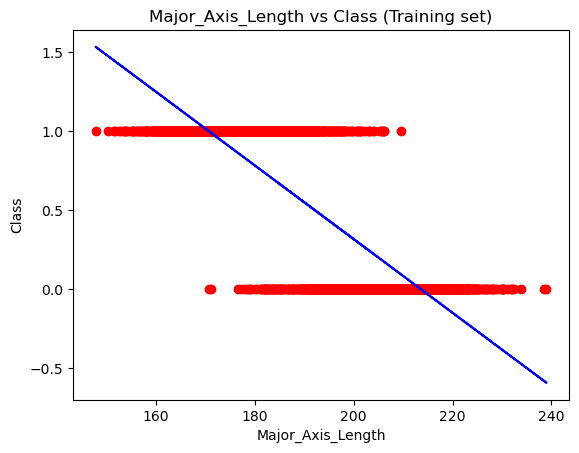

In [33]:
X1 = data.iloc[:, 2:3].values
y1 = data.iloc[:, -1].values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 1/4, random_state = 0) 
regressor = LinearRegression()
regressor.fit(X1_train, y1_train)
y1_pred = regressor.predict(X1_test)
plt.scatter(X1_train, y1_train, color = 'red')
plt.plot(X1_train, regressor.predict(X1_train), color = 'blue')
plt.title('Major_Axis_Length vs Class (Training set)')
plt.xlabel('Major_Axis_Length')
plt.ylabel('Class')
plt.show()

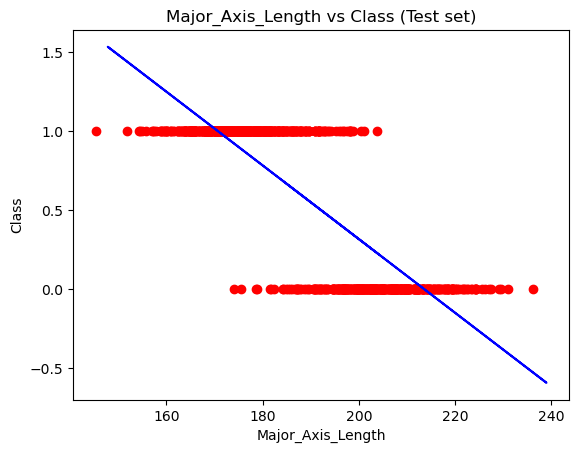

In [31]:
plt.scatter(X1_test, y1_test, color = 'red')
plt.plot(X1_train, regressor.predict(X1_train), color = 'blue')
plt.title('Major_Axis_Length vs Class (Test set)')
plt.xlabel('Major_Axis_Length')
plt.ylabel('Class')
plt.show()

In [42]:
a = regressor.coef_
b = regressor.intercept_

In [47]:
# Можно использовать и так
Major_Axis_Length = 200

Class  = a * Major_Axis_Length + b 
Class

array([0.31555206])